# Deep Learning with PyTorch Presentation

## Introduction 

**Deep Learning** is a subfield of **Machine Learning**, which is a subfield of **Artificial Intelligence**, that involves training artificial neural networks to learn patterns in data.

- Many would say that the modern hype around Deep Learning began in 2012 with the ImageNet competition. But its roots go back to the 1950s.
- It has seen numerous applications:
    - Speech Recognition
    - Image Classification
    - Regression
    - Autonomous Driving
    - Image Segmentation
    - Text Generation
    - and more!
- **ChatGPT** and other LLMs are built via Deep Learning.
- PyTorch is a popular deep learning library that provides a flexible and efficient platform for building and training neural networks (you'll learn more about NN's later).
- Surpisingly, much of the mathematics behind Deep Learning are not that complicated.
- We will focus on **supervised learning**.
- Lets get started!

<img src="imgs/cool_brain_2.png" style="margin: auto; display: block;" alt="Cool Brain" width="500">


## Installs and Imports

In [ ]:
%pip install torch matplotlib

In [38]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Background


### Pytorch Basics


In [39]:
x0 = torch.tensor([1, 2, 3])

print(x0)
print()
print(f'x0.ndim = {x0.ndim}')
print(f'x0.shape = {x0.shape}')
print(f'x0.dtype = {x0.dtype}')

tensor([1, 2, 3])

x0.ndim = 1
x0.shape = torch.Size([3])
x0.dtype = torch.int64


In [40]:
x1 = torch.tensor([[1, 1, 0], [0, 0, 1], [1, 0, 1]])

print(x1)
print()
print(f'x1.ndim = {x1.ndim}')
print(f'x1.shape = {x1.shape}')
print(f'x1.dtype = {x1.dtype}')


tensor([[1, 1, 0],
        [0, 0, 1],
        [1, 0, 1]])

x1.ndim = 2
x1.shape = torch.Size([3, 3])
x1.dtype = torch.int64


In [41]:
x2 = torch.tensor([[[1, 1, 0], [0, 0, 1], [1, 0, 1]], [[1, 0, 1], [0, 1, 0], [1, 0, 1]], [[0, 0, 0], [0, 0, 1], [0, 1, 0]]])

print(x2)
print()
print(f'x2.ndim = {x2.ndim}')
print(f'x2.shape = {x2.shape}')
print(f'x2.dtype = {x2.dtype}')

tensor([[[1, 1, 0],
         [0, 0, 1],
         [1, 0, 1]],

        [[1, 0, 1],
         [0, 1, 0],
         [1, 0, 1]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 1, 0]]])

x2.ndim = 3
x2.shape = torch.Size([3, 3, 3])
x2.dtype = torch.int64


In [42]:
# special ways to make tensors

x3 = torch.zeros(2, 3)
x4 = torch.ones(2, 3)
x5 = torch.full((2, 3), 115)
x6 = torch.randn(2, 3)

print(x3)
print()
print(x4)
print()
print(x5)
print()
print(x6)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor([[1., 1., 1.],
        [1., 1., 1.]])

tensor([[115, 115, 115],
        [115, 115, 115]])

tensor([[-0.6985,  0.3861,  1.0167],
        [-1.0695, -0.4295,  0.1752]])


In [43]:
# get the value of a tensor (with only one element)

x = torch.tensor([42])
x.item()

42

### Conceptual Background


<img src="imgs/nn_schematic.png" alt="Neural Network Schematic" width="500">

- Inputs are represented as vectors (i.e. lists (or multidimensional lists) of numbers).
- They are passed through layers (which contain weights, biases, and activation functions).
- The result is used to make a prediction.

In essence, a network is a function that maps inputs to outputs, but importantly, this network can be trained!

In [44]:
import torch.nn.functional as F

In [45]:
# Lets see a quick example

x = torch.tensor([1, 2, 3], dtype=torch.float32)

linear_layer1 = torch.nn.Linear(in_features=3, out_features=3, dtype=torch.float32)
linear_layer2 = torch.nn.Linear(in_features=3, out_features=1, dtype=torch.float32)

x = linear_layer1(x)
x = linear_layer2(x)
y = F.sigmoid(x)

print()
print(f'output = {y.item()}') # What do we notice about the output?


output = 0.3827368915081024


### Mathematical Background


#### Linear Algebra

Let $x$ be the input vector and $Layer_1$ be the first layer of our network.

$$
x = \begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$$

$$
A = \begin{bmatrix}
2 & 2 & 1 \\
1 & 4 & 7 \\
7 & 1 & 3
\end{bmatrix}
$$

Lets see what matrix multiplication does...

$$
xA = 
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
2 & 2 & 1 \\
1 & 4 & 7 \\
7 & 1 & 3
\end{bmatrix}
=
\begin{bmatrix}
1*2 + 2*1 + 3*7 & 1*2 + 2*4 + 3*1 & 1*1 + 2*7 + 3*3
\end{bmatrix}
=
\begin{bmatrix}
25 & 13 & 24
\end{bmatrix}
$$

In [46]:
x = torch.tensor([1, 2, 3], dtype=torch.float32)

A = torch.tensor(
    [[2, 2, 1], 
     [1, 4, 7], 
     [7, 1, 3]], 
    dtype=torch.float32
)

print(f'xA = {x @ A}')

xA = tensor([25., 13., 24.])


So our neural is composed of two layers, which means we have two matrices.

$$
Layer_1 = \begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
$$

$$
Layer_2 = \begin{bmatrix}
b_{1} \\
b_{2} \\
b_{3} 
\end{bmatrix}
$$

In [47]:
# What about the bias?

x = torch.tensor([1, 2, 3], dtype=torch.float32)

bias = torch.full((1,3), 1)

print(f'x = {x}\n')
print(f'bias = {bias}\n')
print(f'x + bias = {x + bias}')

x = tensor([1., 2., 3.])

bias = tensor([[1, 1, 1]])

x + bias = tensor([[2., 3., 4.]])


<img src="imgs/neuron.png" alt="Neuron" style="margin: auto; display: block;" width="500">

### Activations Functions

- Activation functions are used to introduce nonlinearity into the network.
- Multiplication and Addition are linear operations. As such, it can be difficult to learn complex patterns.

<br/>

<img src="imgs/actfuncs.jpg" alt="Activation Functions" style="margin: auto; display: block;" width="500">

In [48]:
x0 = torch.tensor([1])
x1 = torch.tensor([-1])

act = F.sigmoid

print(f'act(x0) = {act(x0)}')
print(f'act(x1) = {act(x1)}')

act(x0) = tensor([0.7311])
act(x1) = tensor([0.2689])


In [49]:
# sigmoid finds use in binary classification problems.
def classify(x):
    return 'Dog' if act(x) > 0.5 else 'Cat'

print(f'classify(x0) = {classify(x0)}')
print(f'classify(x1) = {classify(x1)}')

# Notice how sigmoid relates numbers to probabilities!

classify(x0) = Dog
classify(x1) = Cat


### Calculus

A function is a rule that maps inputs to outputs.
$$
f(x) = x^2
$$


**Definition**: rate of change of a function with respect to its input.

It is defined as:
$$
\frac{d}{dx} f(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

Fortunately, there are some rules for finding derivatives quickly.

In [50]:
# Define a function
def f(x):
    return 3*x

print(f'f(1) = {f(1)}')
print(f'f(2) = {f(2)}')
print(f'f(3) = {f(3)}')

f(1) = 3
f(2) = 6
f(3) = 9


In [51]:
# The derivative of a constant times a variable is the constant. As such,
def df(x):
    return 3

print(f'df(1) = {df(1)}')
print(f'df(2) = {df(2)}')
print(f'df(3) = {df(3)}')

df(1) = 3
df(2) = 3
df(3) = 3


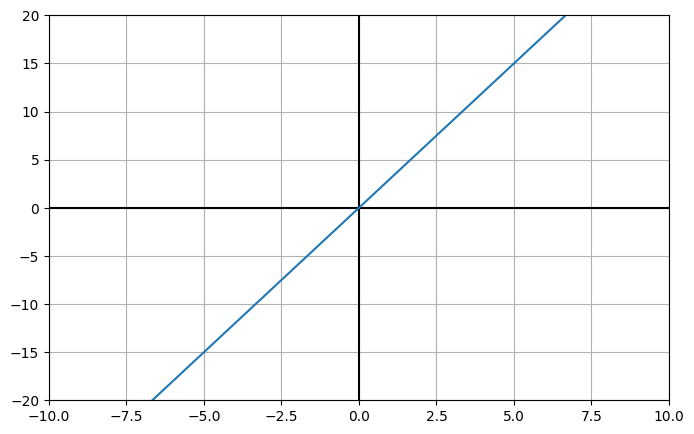

In [52]:
x = np.arange(-10, 10, 0.1) # returns an array of numbers between -10 and 10 with a step size of 0.1

y = f(x)

fig, ax = plt.subplots(figsize=(8, 5))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlim(-10, 10)
ax.set_ylim(-20, 20)
ax.plot(x, y)
plt.show()

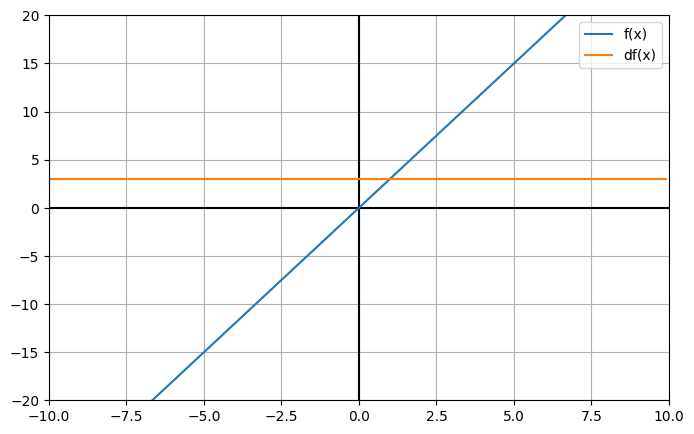

In [53]:
x = np.arange(-10, 10, 0.1) # returns an array of numbers between -10 and 10 with a step size of 0.1

y = f(x)
y_prim = [df(x_i) for x_i in x]

fig, ax = plt.subplots(figsize=(8, 5))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(x, y, label='f(x)')
ax.plot(x, y_prim, label="df(x)")
ax.set_xlim(-10, 10)
ax.set_ylim(-20, 20)
plt.legend()
plt.show()

**But why do we even care about derivatives?**


## Backpropagation

- Backpropagation is the process of updating the parameters (weights and biases) of a network to minimize a loss function.

<br/>

**For Deep Learning this process is known as Gradient Descent**

<img src="imgs/loss_fn.jpg" alt="" style="margin: auto; display: block;" width="500">


### Loss Functions

- The loss measures the difference between the actual output and the predicted output.


In [57]:
# regression

y = torch.tensor([10.5], dtype=torch.float32)
target = torch.tensor([11], dtype=torch.float32)

print(f'L1 Loss = {F.l1_loss(y, target).item()}') # i.e. mae (mean absolute error)
print(f'MSE = {F.mse_loss(y, target).item()}') # i.e. L2-squared

L1 Loss = 0.5
MSE = 0.25


$\text{L1 Loss} = \dfrac{1}{n} \sum\limits_{i=1}^{n} |y_i - \hat y_i|$ 
<br/>
<br/>
$\text{MSE}=\dfrac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat y_i)^2$

In [61]:
# (binary) classification 

y = torch.tensor([.9], dtype=torch.float32)
target = torch.tensor([1], dtype=torch.float32)

F.binary_cross_entropy(y, target) # requres targets be the range 0-1, sound familiar?

tensor(0.1054)

$\text{BCE}=(\hat y_i)log(p_i) + (1 - \hat y_i)log(1 - p_i)$

### Back to Backpropagation

- Information is propagated backward through the network.
- At each step you calculate the derivate of the loss function with respect the particular parameter (this is the Chain Rule from Calculus).

<img src="imgs/backprop.png" style="display: block; margin:auto" width="500">

- (Note to Self: Revisit Gradient Descent Image)

In [62]:
inputs = torch.tensor(
    [[[1, 0, 4],
    [3, -2, 1],
    [4, -2, 1]],

    [[4, 2, 1],
     [0, 10, -2],
     [8, 4, 2]],

    [[-1, 2, 3],
     [-7, 4, 3],
     [1, 3, 5]]],
     dtype=torch.float32
)

targets = torch.tensor([[10], [29], [13]], dtype=torch.float32)

In [63]:
print(f'Inputs Shape: {inputs.shape}')
print(f'Target Shape: {targets.shape}')

Inputs Shape: torch.Size([3, 3, 3])
Target Shape: torch.Size([3, 1])


In [64]:
torch.nn.Flatten()(inputs)

tensor([[ 1.,  0.,  4.,  3., -2.,  1.,  4., -2.,  1.],
        [ 4.,  2.,  1.,  0., 10., -2.,  8.,  4.,  2.],
        [-1.,  2.,  3., -7.,  4.,  3.,  1.,  3.,  5.]])

In [65]:
# create a network

flat = torch.nn.Flatten()
layer1 = torch.nn.Linear(in_features=9, out_features=9)
layer2 = torch.nn.Linear(in_features=9, out_features=3)
layer3 = torch.nn.Linear(in_features=3, out_features=1)

In [66]:
# forward pass

x = flat(inputs)
x = layer1(x)
x = F.relu(x)
x = layer2(x)
x = F.relu(x)
y = layer3(x)

# calculate loss
loss = F.mse_loss(y, targets) # this is a regression task

# backpropagate
loss.backward()


In [67]:
# lets watch the weights
for name, param in layer3.named_parameters():
    if param.requires_grad:
        print(f'Gradient for {name} in layer1:\n {param.grad}')
        print()

Gradient for weight in layer1:
 tensor([[-43.4901,  -7.7152,   0.0000]])

Gradient for bias in layer1:
 tensor([-35.2039])



### Optimizers

In [68]:
import torch.nn as nn

In [81]:
class net(nn.Module):
    def __init__(self, dims=(9, 9, 9, 1)):
        super().__init__()
        self.layer1 = nn.Linear(dims[0], dims[1])
        self.layer2 = nn.Linear(dims[1], dims[2])
        self.layer3 = nn.Linear(dims[2], dims[3])
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        y = self.layer3(x)
        return y

In [82]:
net1 = net()

opt = torch.optim.Adam(net1.parameters(), lr=0.1) # the Adam optimizer

In [83]:
for i in range(100):
    # forward pass
    preds = net1(inputs)

    # calculate loss
    loss = F.mse_loss(preds, targets)

    # backpropagate
    loss.backward()
    opt.step() # update weights
    opt.zero_grad()

    if i % 10 == 0: print(f'loss at iteration {i} = {loss}')

loss at iteration 0 = 397.6874084472656
loss at iteration 10 = 18.23792266845703
loss at iteration 20 = 11.089072227478027
loss at iteration 30 = 6.461925029754639
loss at iteration 40 = 0.7534823417663574
loss at iteration 50 = 0.7346885800361633
loss at iteration 60 = 0.2687118947505951
loss at iteration 70 = 0.02026679739356041
loss at iteration 80 = 0.01933770440518856
loss at iteration 90 = 0.017806924879550934


In [84]:
preds = net1(inputs)

print(f'Predictions\n{preds}')
print()
print(f'Targets\n{targets}')

Predictions
tensor([[ 9.9672],
        [28.8895],
        [12.9294]], grad_fn=<AddmmBackward0>)

Targets
tensor([[10.],
        [29.],
        [13.]])
